In [2]:
"""
x_train
y_train 
f_wb
j_wb
w
b
"""

'\nx_train\ny_train \nf_wb\nj_wb\nw\nb\n'

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#x_train = np.array([77,21,22,20,36,15,62,95,20,5,4,19,96,62,36,15,65,14,87,69,89,51,89,27,97,58,79,21,93,27,99,31,33,80,28,47,53,69,28])
#y_train = np.array([79.77515201,23.17727887,25.60926156,17.85738813,41.84986439,9.805234876,58.87465933,97.61793701,18.39512747,8.746747654,2.811415826,17.09537241,95.14907176,61.38800663,40.24701716,14.82248589,66.95806869,16.63507984,90.65513736,77.22982636,92.11906278,46.91387709,89.82634442,21.71380347,97.41206981,57.01631363,78.31056542,19.1315097,93.03483388,26.59112396,97.55155344,31.43524822,35.12724777,78.61042432,33.07112825,51.69967172,53.62235225,69.46306072,27.42497237])

x_train = np.array([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])
y_train = np.array([39343.00,46205.00,37731.00,43525.00,39891.00,56642.00,60150.00,54445.00,64445.00,57189.00,63218.00,55794.00,56957.00,57081.00,61111.00,67938.00,66029.00,83088.00,81363.00,93940.00,91738.00,98273.00,101302.00,113812.00,109431.00,105582.00,116969.00,112635.00,122391.00,121872.00])

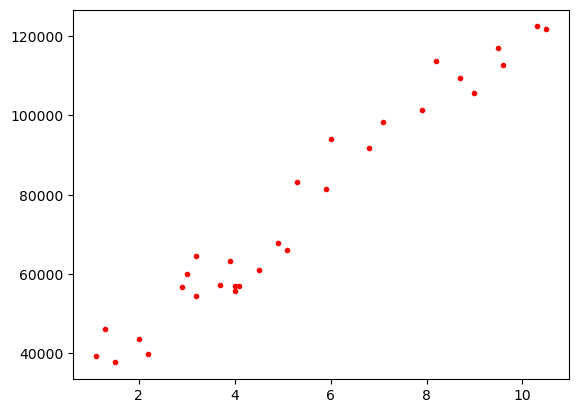

In [5]:
plt.scatter(x_train,y_train,c="r",marker=".")
plt.show()

In [6]:
def compute_cost(x, y, w, b):
    """
    j_wb = 1/(2*m)* sum_im(f_wb(x[i])-y[i])**2
    """
    cost =0 
    m = len(x)
    for i in range(m):
        f_wb = w*x[i] +b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [7]:
compute_cost(x_train,y_train,200,100)

3149229195.366667

In [8]:
def compute_gradient(x, y, w, b):
    """
    w= w - alpha *d/dw(j_wb(x[i]) - y[i])
    d/dw(j_wb(x[i]) - y[i]) = 1/m sum_im(w*x[i] +b)*x[i]
    b = w- alpha *d/db(j_wb(x[i]) - y[i])
    d/db(j_wb(x[i]) - y[i]) = 1/m sum_im(w*x[i] +b)
    """
    
    m = len(x)
    dj_dw = 0 
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] +b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i 
        dj_db += dj_db_i
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw , dj_db

In [9]:
compute_gradient(x_train,y_train,200,100)

(-469664.0333333333, -74840.33333333333)

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_func, gradient_func):
    j_history = []
    args_history = []
    
    b= b_in
    w= w_in
    
    for i in range(num_iters):
        dj_dw , dj_db = gradient_func(x, y, w, b)
        w= w - alpha* dj_dw
        b= w - alpha* dj_db
        
        if i<100000:
            j_history.append(cost_func(x, y, w, b))
            args_history.append([w,b])
            
        #if i% math.ceil(num_iters/10)==0:
            #print(f"i = {i},--, cost= {j_history},--, args= {args_history},--, dj_dw= {dj_dw: 0.3e},--, dj_db= {dj_db: 0.3e},--, w= {w:0.3e},--, b= {b:0.3e}")
            
    return w,b, j_history, args_history

In [11]:
w_init = 0
b_init = 0
iterations = 100000
tmp_alpha = 1.0e-2
#gradient_descent(x_train, y_train, w_init , b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (11546.9501,11577.6754)


In [12]:
def hmm (x, w, b):
    arr= []
    for i in range(len(x)):
        f_wb = w* x[i] + b
        arr.append(f_wb)
    return arr
arr = hmm(x_train, w_final, b_final)

In [13]:
sabry= 40
print(w_final*sabry +b_final)

473455.6780196682


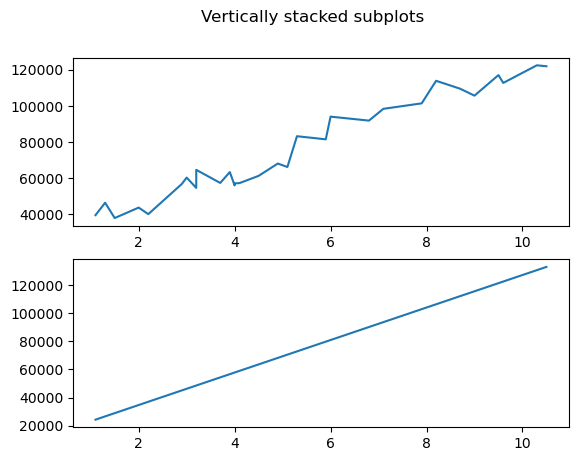

In [14]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x_train, y_train)
axs[1].plot(x_train, arr)

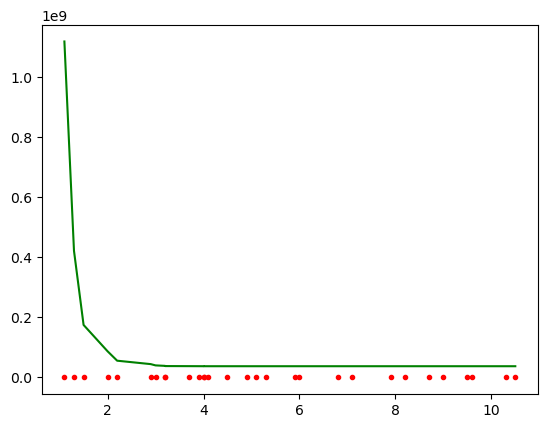

In [15]:
plt.scatter(x_train, y_train,marker=".",c="r")
plt.plot(x_train,J_hist[:len(x_train)],c="g")
plt.show()

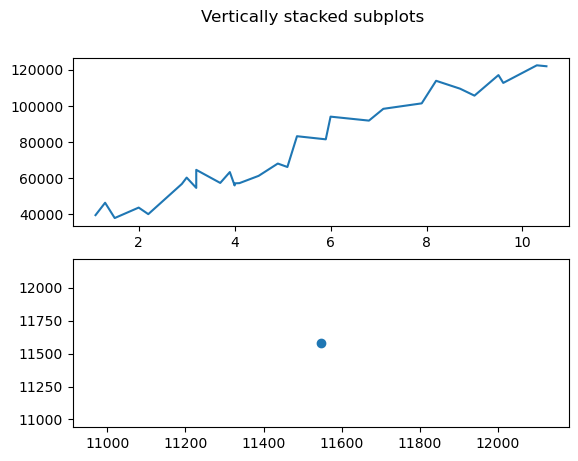

In [16]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x_train, y_train)
axs[1].scatter(w_final, b_final)